## Diabetes Prediction Using Machine Learning

### Overview
This project predicts whether a patient has diabetes or not based on the features in the dataset provided to the machine learning model, and for that, the famous Pima Indians Diabetes Database will be used.

### 1, Importing Libraries

In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

sns.set()

from mlxtend.plotting import plot_decision_regions
import missingno as msno
from pandas.plotting import scatter_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.metrics import classification_report
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline


### 2, Reading the dataset which is in the CSV format

In [19]:
diabetes_df = pd.read_csv('diabetes.csv')
diabetes_df.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


### 3, Exploratory Data Analysis (EDA)

#### 3.1, List all the columns available in the dataset.

In [20]:
diabetes_df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

#### 3.2, Information about the dataset

In [21]:
diabetes_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


#### 3.3, Description about the dataset

In [24]:
diabetes_df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


#### 3.4, More about the dataset with transpose

In [25]:
diabetes_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


#### 3.5, Check if the dataset have a null values

In [27]:
diabetes_df.isnull().head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False
5,False,False,False,False,False,False,False,False,False
6,False,False,False,False,False,False,False,False,False
7,False,False,False,False,False,False,False,False,False
8,False,False,False,False,False,False,False,False,False
9,False,False,False,False,False,False,False,False,False


#### 3.6, Check how many null values do every columns have

In [28]:
diabetes_df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

N.B:- Here from the above code I first checked that is there any null values from the IsNull() function then I am going to take the sum of all those missing values from the sum() function and the inference I now get is that there are no missing values but that is not a true story as in this particular dataset all the missing values were given the 0 as a value which is not good for the authenticity of the dataset. Hence I will first replace the 0 value with the NAN value and then start the imputation process.

#### 3.7, Showing the Count of NANs

In [31]:
diabetes_df_copy = diabetes_df.copy(deep = True)
diabetes_df_copy[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']] = diabetes_df_copy[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']].replace(0,np.NaN)
print(diabetes_df_copy.isnull().sum())

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64


### 4, Data Visualization

#### 4.1, Data distribution plots before removing null values

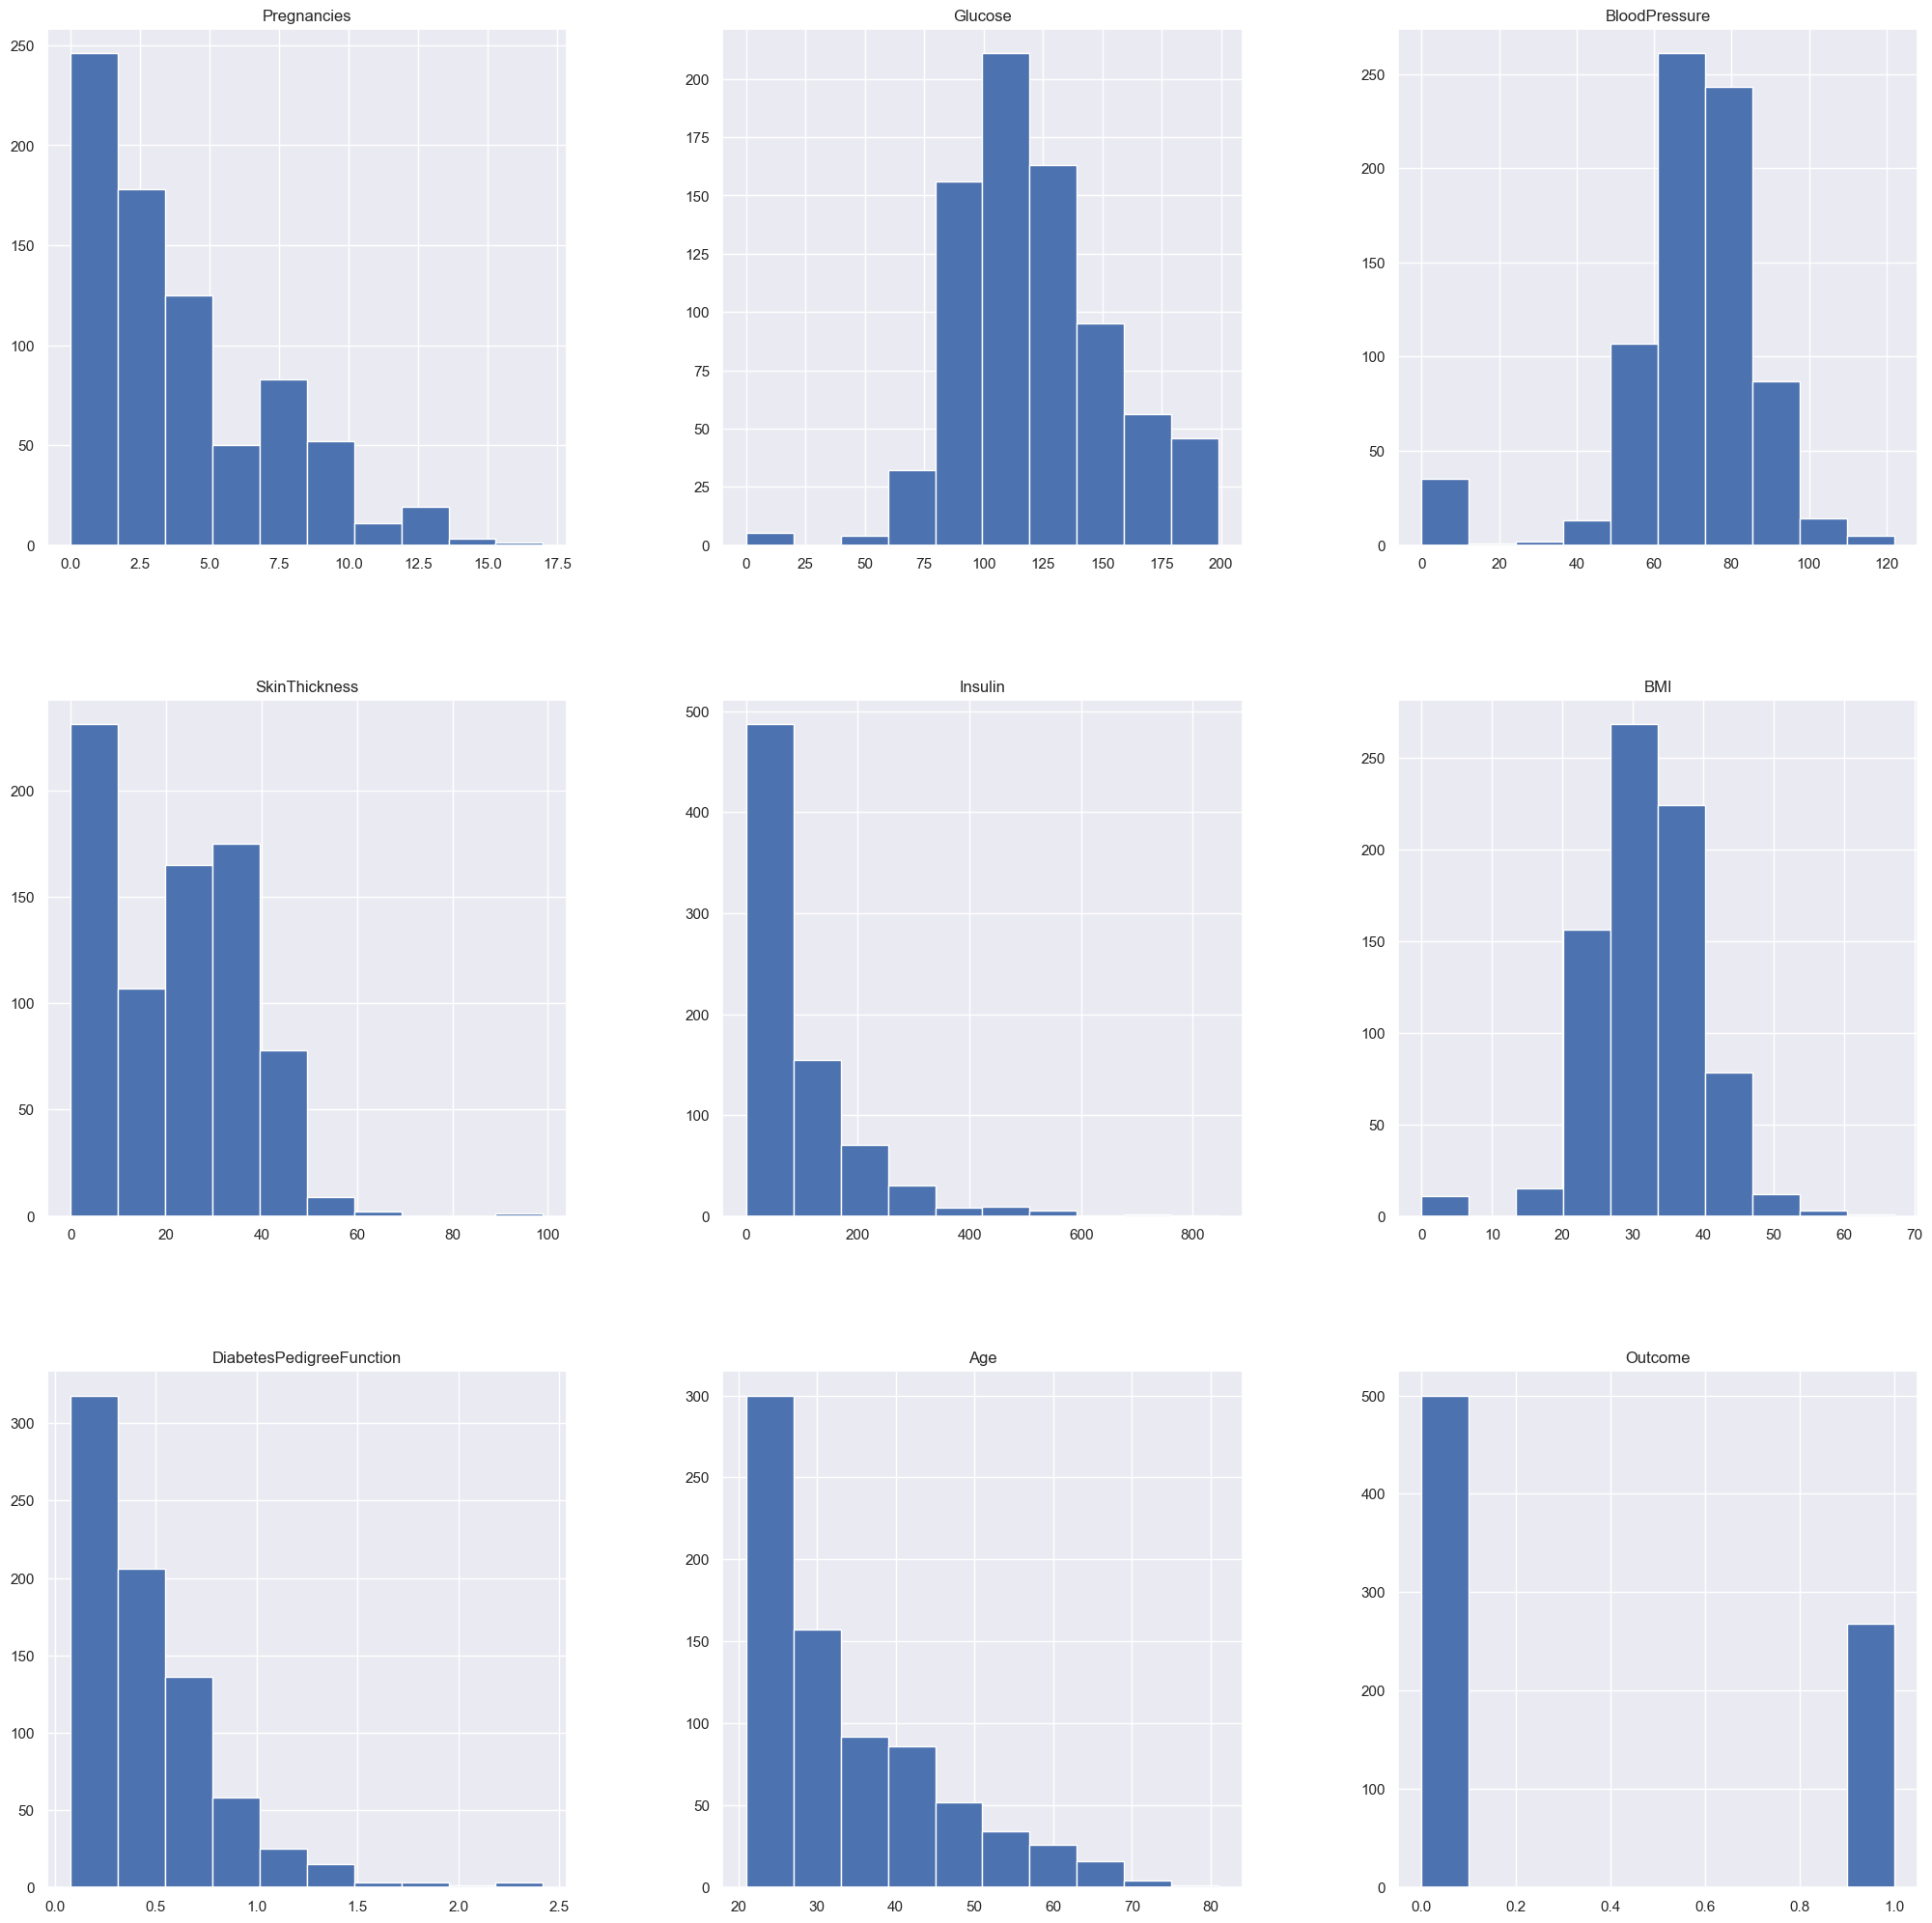

In [38]:
p = diabetes_df.hist(figsize = (25,25))

**Inference:** So here I have seen the distribution of each feature whether it is dependent data or independent data and one thing which could always strike that why do I need to see the distribution of data? So the answer is simple it is the best way to start the analysis of the dataset as it shows the occurrence of every kind of value in the graphical structure which in turn lets us know the range of the data.

#### 4.2, Now I will be imputing the mean value of the column to each missing value of that particular column and Plotting the distributions after removing the NAN values.

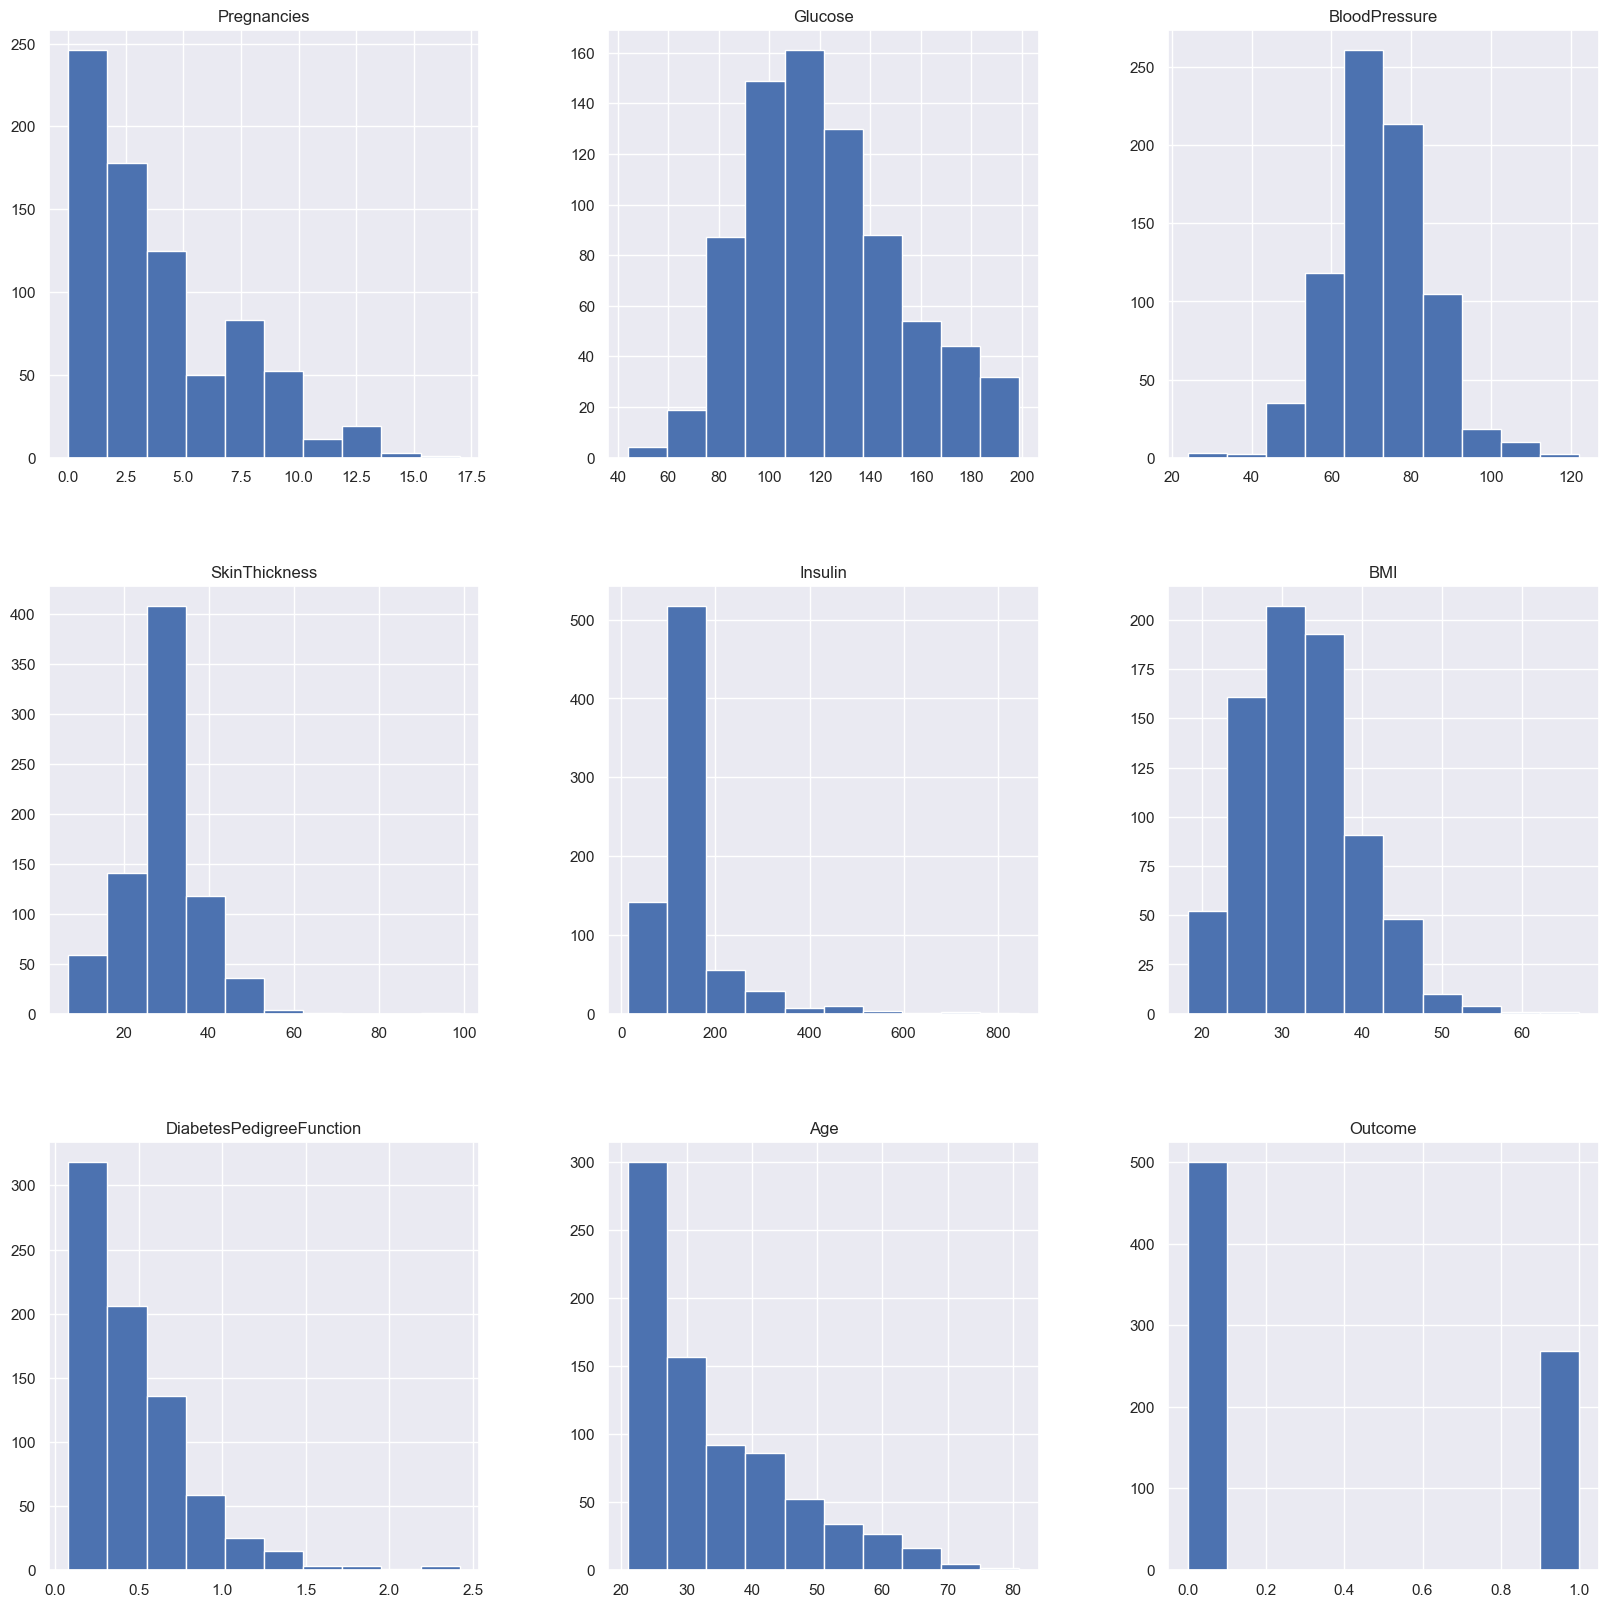

In [41]:
diabetes_df_copy['Glucose'].fillna(diabetes_df_copy['Glucose'].mean(), inplace = True)
diabetes_df_copy['BloodPressure'].fillna(diabetes_df_copy['BloodPressure'].mean(), inplace = True)
diabetes_df_copy['SkinThickness'].fillna(diabetes_df_copy['SkinThickness'].median(), inplace = True)
diabetes_df_copy['Insulin'].fillna(diabetes_df_copy['Insulin'].median(), inplace = True)
diabetes_df_copy['BMI'].fillna(diabetes_df_copy['BMI'].median(), inplace = True)

p = diabetes_df_copy.hist(figsize = (20,20))

**Inference:** Here I am again using the hist plot to see the distribution of the dataset but this time I'm using this visualization to see the changes that I can see after those null values are removed from the dataset and I can see the difference for example – In age column after removal of the null values, I can see that there is a spike at the range of 50 to 100 which is quite logical as well.

#### 4.3, Plotting Null Count Analysis Plot

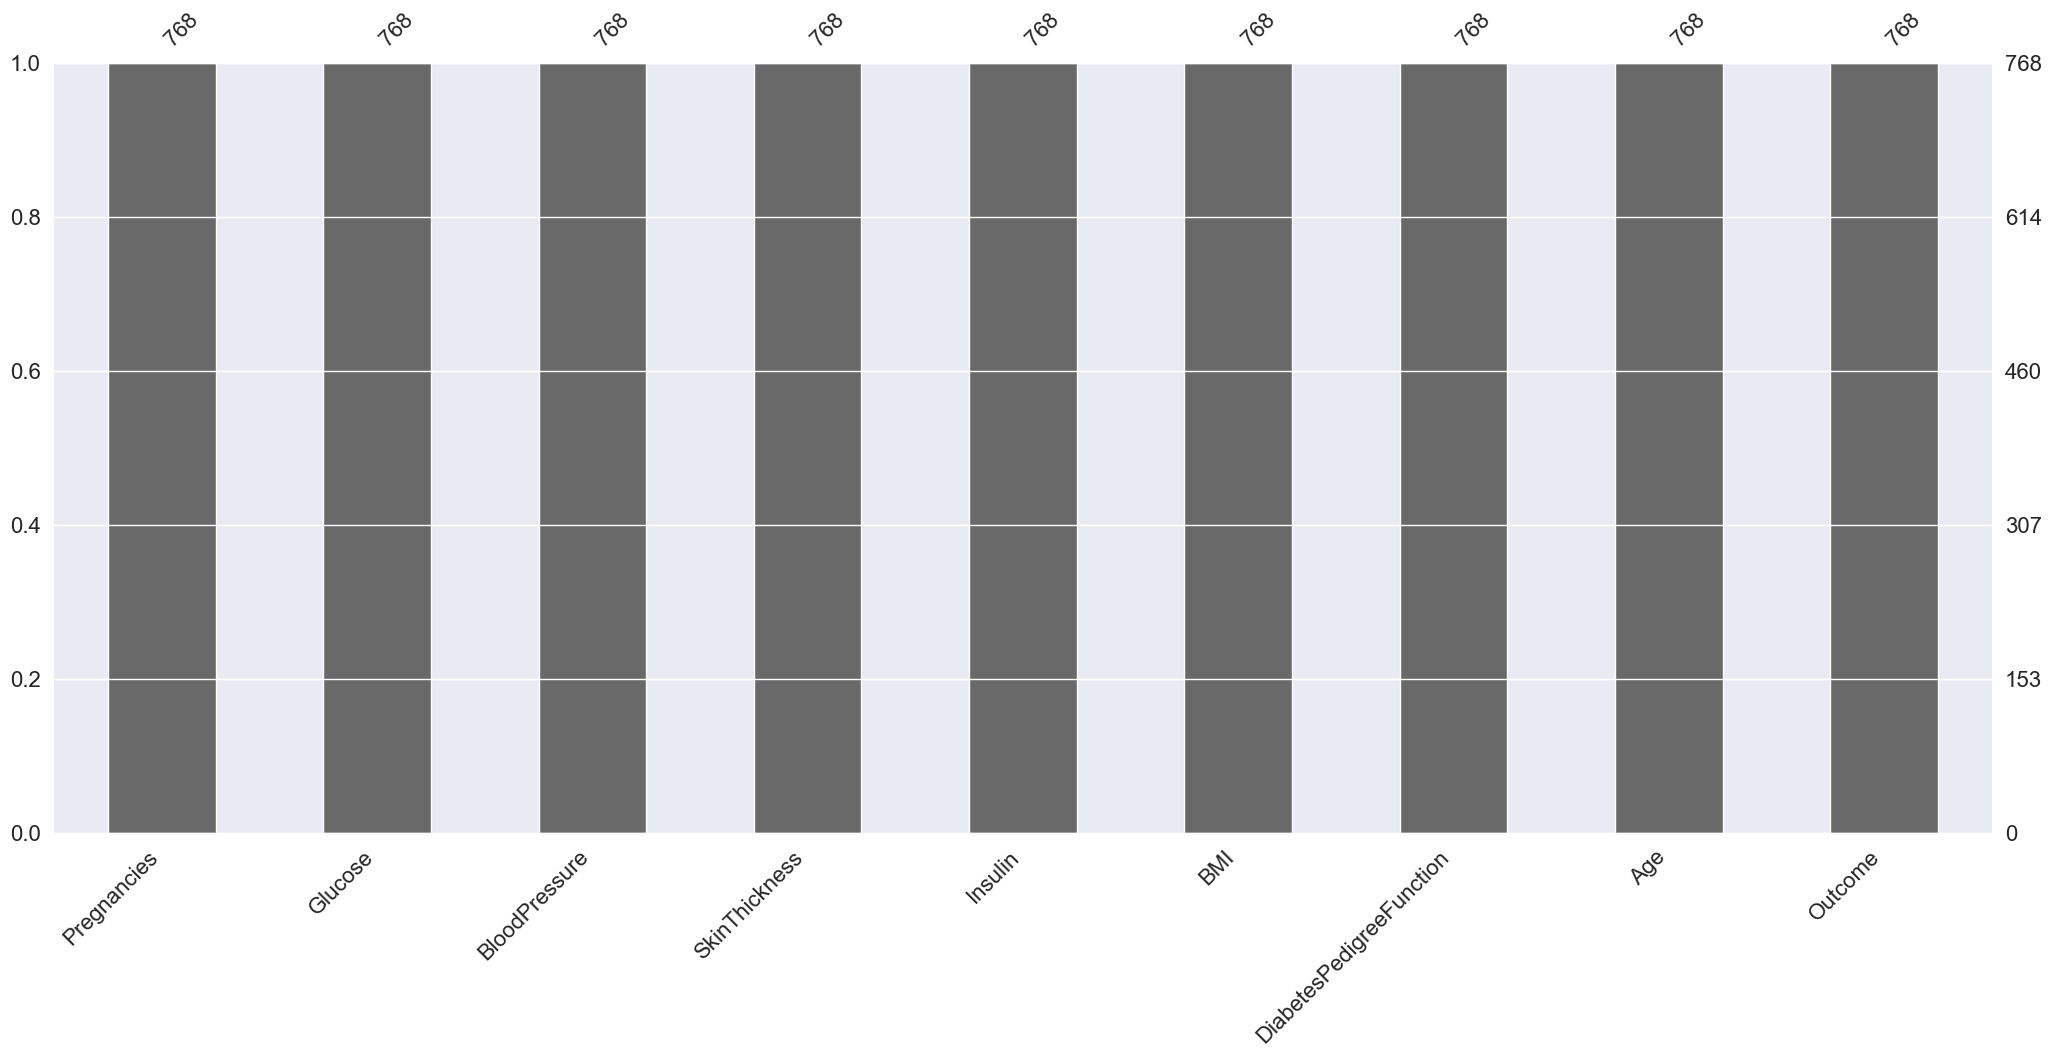

In [44]:
p = msno.bar(diabetes_df)

**Inference:** Now in the above graph, see that there are no null values in the dataset.

#### 4.4 check how well the outcome column is balanced

Outcome
0    500
1    268
Name: count, dtype: int64


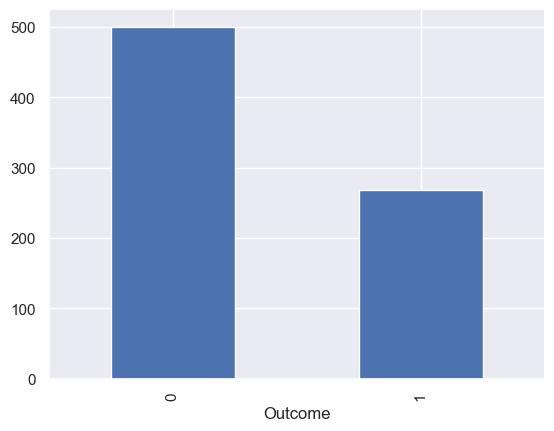

In [45]:
color_wheel = {1: "#0392cf", 2: "#7bc043"}
colors = diabetes_df["Outcome"].map(lambda x: color_wheel.get(x + 1))
print(diabetes_df.Outcome.value_counts())
p=diabetes_df.Outcome.value_counts().plot(kind="bar")

**Inference:** Here from the above visualization it is clearly visible that the dataset is completely imbalanced the number of ***patients who are diabetic is half of the patients who are non-diabetic***.

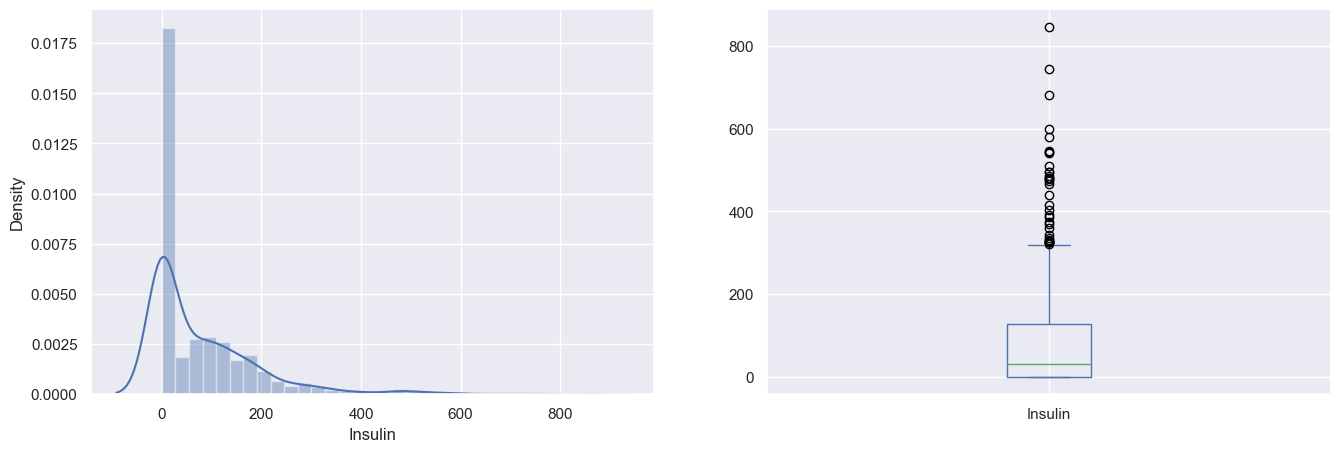

In [46]:
plt.subplot(121), sns.distplot(diabetes_df['Insulin'])
plt.subplot(122), diabetes_df['Insulin'].plot.box(figsize=(16,5))
plt.show()

**Inference:** That’s how Distplot can be helpful where one will able to see the distribution of the data as with the help of boxplot one can see the outliers in that column and other information which can be derived by the box and whiskers plot.

#### 4.5, Correlation between all the features before cleaning

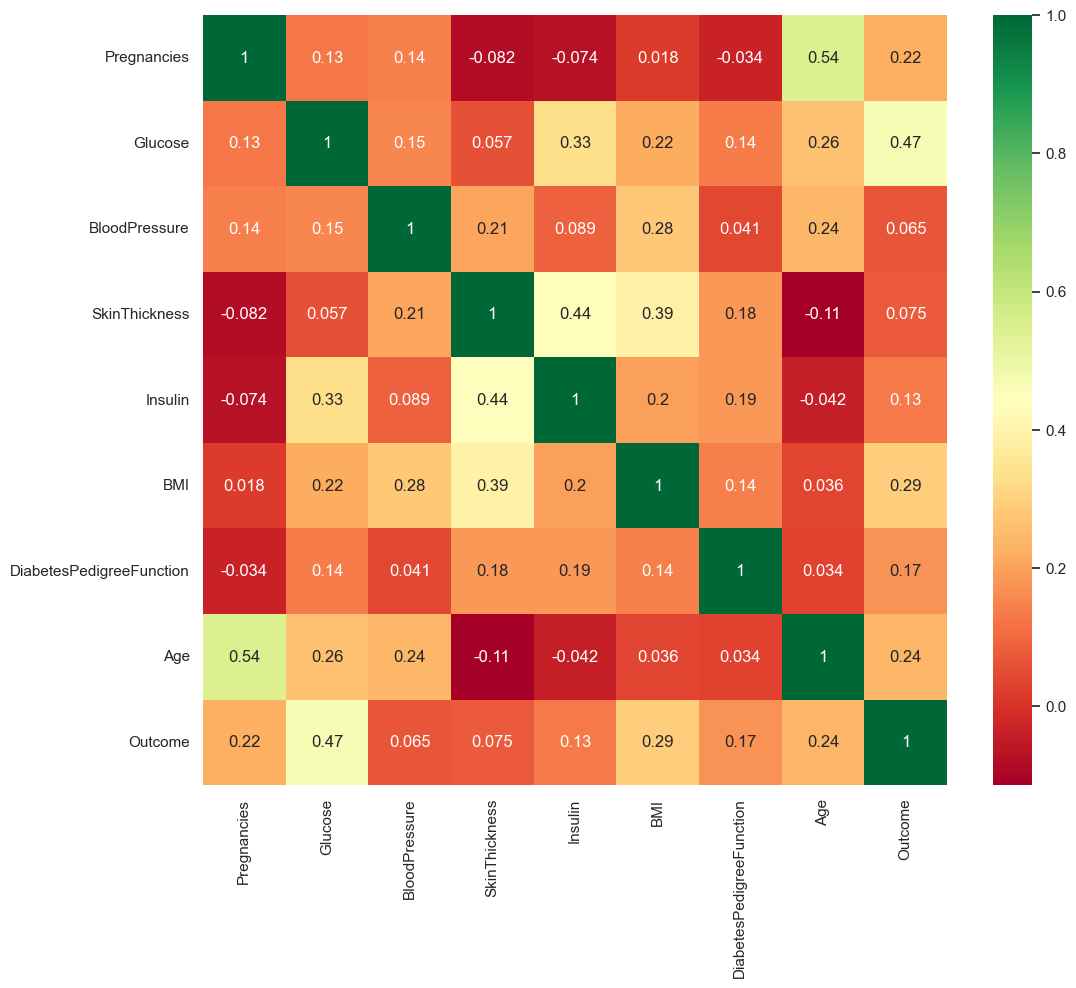

In [47]:
plt.figure(figsize=(12,10))
# seaborn has an easy method to showcase heatmap
p = sns.heatmap(diabetes_df.corr(), annot=True,cmap ='RdYlGn')

### 5, Scaling the Data

#### 5.1, Before scaling down the data, have a look into it

In [48]:
diabetes_df_copy.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.0,125.0,33.6,0.627,50,1
1,1,85.0,66.0,29.0,125.0,26.6,0.351,31,0
2,8,183.0,64.0,29.0,125.0,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1


#### 5.1, After scaling down the data

In [50]:
sc_X = StandardScaler()
X =  pd.DataFrame(sc_X.fit_transform(diabetes_df_copy.drop(["Outcome"],axis = 1),), columns=['Pregnancies', 
'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age'])
X.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.639947,0.865108,-0.033518,0.670643,-0.181541,0.166619,0.468492,1.425995
1,-0.844885,-1.206162,-0.529859,-0.012301,-0.181541,-0.852200,-0.365061,-0.190672
2,1.233880,2.015813,-0.695306,-0.012301,-0.181541,-1.332500,0.604397,-0.105584
3,-0.844885,-1.074652,-0.529859,-0.695245,-0.540642,-0.633881,-0.920763,-1.041549
4,-1.141852,0.503458,-2.680669,0.670643,0.316566,1.549303,5.484909,-0.020496


That’s how the dataset will look like when it is scaled down or can see every value now is on the same scale which will help the ***ML model to give a better result***.

### 6, Model Building

#### 6.1, Splitting the dataset

In [52]:
X = diabetes_df.drop('Outcome', axis=1)
y = diabetes_df['Outcome']

##### Now split the data into training and testing data using the train_test_split function

In [53]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.33,
                                                    random_state=7)

#### 6.2, Using Random Forest

In [55]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(n_estimators=200)
rfc.fit(X_train, y_train)

RandomForestClassifier(n_estimators=200)

Now after building the model, check the accuracy of the model on the training dataset.

In [56]:
rfc_train = rfc.predict(X_train)
from sklearn import metrics

print("Accuracy_Score =", format(metrics.accuracy_score(y_train, rfc_train)))

Accuracy_Score = 1.0


##### So here, The training dataset of the model is overfitted.
Getting the accuracy score for Random Forest

In [57]:
from sklearn import metrics

predictions = rfc.predict(X_test)
print("Accuracy_Score =", format(metrics.accuracy_score(y_test, predictions)))

Accuracy_Score = 0.7677165354330708


#### 6.3, Using Decision Tree

In [58]:
from sklearn.tree import DecisionTreeClassifier

dtree = DecisionTreeClassifier()
dtree.fit(X_train, y_train)

DecisionTreeClassifier()

##### Getting the accuracy score for Decision Tree

In [59]:
from sklearn import metrics

predictions = dtree.predict(X_test)
print("Accuracy Score =", format(metrics.accuracy_score(y_test,predictions)))

Accuracy Score = 0.7047244094488189


##### Classification report and confusion matrix of the decision tree model

In [60]:
from sklearn.metrics import classification_report, confusion_matrix

print(confusion_matrix(y_test, predictions))
print(classification_report(y_test,predictions))

[[127  35]
 [ 40  52]]
              precision    recall  f1-score   support

           0       0.76      0.78      0.77       162
           1       0.60      0.57      0.58        92

    accuracy                           0.70       254
   macro avg       0.68      0.67      0.68       254
weighted avg       0.70      0.70      0.70       254



### 6.4, Using XgBoost classifier

In [62]:
from xgboost import XGBClassifier

xgb_model = XGBClassifier(gamma=0)
xgb_model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

##### Getting the accuracy score for the XgBoost classifier

In [68]:
from sklearn import metrics

xgb_pred = xgb_model.predict(X_test)
print("Accuracy Score =", format(metrics.accuracy_score(y_test, xgb_pred)))

Accuracy Score = 0.7283464566929134


##### classification report and confusion matrix of the XgBoost classifier

In [69]:
from sklearn.metrics import classification_report, confusion_matrix

print(confusion_matrix(y_test, xgb_pred))
print(classification_report(y_test, xgb_pred))

[[128  34]
 [ 35  57]]
              precision    recall  f1-score   support

           0       0.79      0.79      0.79       162
           1       0.63      0.62      0.62        92

    accuracy                           0.73       254
   macro avg       0.71      0.70      0.71       254
weighted avg       0.73      0.73      0.73       254



#### 6.5, Using Support Vector Machine (SVM)

In [67]:
from sklearn.svm import SVC

svc_model = SVC()
svc_model.fit(X_train, y_train)

SVC()

##### Prediction from support vector machine model on the testing data

In [70]:
svc_pred = svc_model.predict(X_test)

##### Accuracy score for SVM

In [71]:
from sklearn import metrics

print("Accuracy Score =", format(metrics.accuracy_score(y_test, svc_pred)))

Accuracy Score = 0.7480314960629921


##### Classification report and confusion matrix of the SVM classifier

In [73]:
from sklearn.metrics import classification_report, confusion_matrix

print(confusion_matrix(y_test, svc_pred))
print(classification_report(y_test, svc_pred))


[[145  17]
 [ 47  45]]
              precision    recall  f1-score   support

           0       0.76      0.90      0.82       162
           1       0.73      0.49      0.58        92

    accuracy                           0.75       254
   macro avg       0.74      0.69      0.70       254
weighted avg       0.74      0.75      0.73       254



### 7, Conclusion from Model Building
##### Therefore Random forest is the best model for this prediction since it has an accuracy_score of 0.76.

### 8, Feature Importance
Knowing about the feature importance is quite necessary as it shows how much weight each feature provides in the model-building phase.
#### 7.1, 
Getting feature importanes

In [74]:
rfc.feature_importances_

array([0.07750562, 0.24623499, 0.08878221, 0.07488274, 0.07641025,
       0.16712498, 0.12838834, 0.14067087])

#### 7.2, Plotting feature importances

<Axes: >

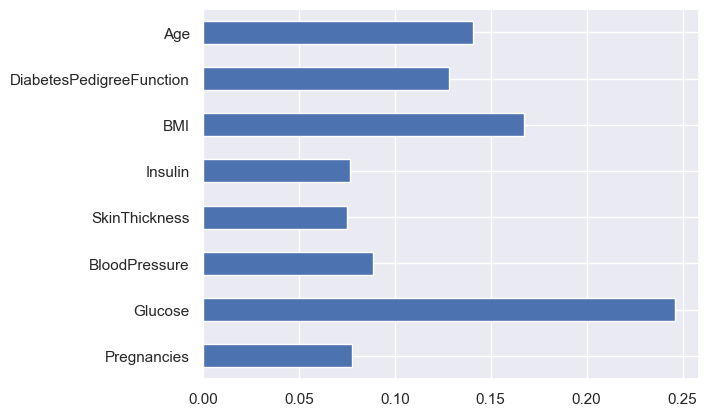

In [75]:
(pd.Series(rfc.feature_importances_, index=X.columns).plot(kind='barh'))

Here from the above graph, it is clearly visible that **Glucose** as a feature is the most important in this dataset.

### 8, Saving Model – Random Forest

In [76]:
import pickle

# Firstly we will be using the dump() function to save the model using pickle
saved_model = pickle.dumps(rfc)

# Then we will be loading that saved model
rfc_from_pickle = pickle.loads(saved_model)

# lastly, after loading that model we will use this to make predictions
rfc_from_pickle.predict(X_test)

array([0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1], dtype=int64)

Now for the last time, I’ll be looking at the head and tail of the dataset so that we can take any random set of features from both the head and tail of the data to test that if our model is good enough to give the right prediction.

In [77]:
diabetes_df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [78]:
diabetes_df.tail()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1
767,1,93,70,31,0,30.4,0.315,23,0


##### Putting data points in the model will either return 0 or 1 i.e. person suffering from diabetes or not.

In [88]:
rfc.predict([[0,137,40,35,168,43.1,2.228,33]]) #4th patient

array([1], dtype=int64)

In [84]:
rfc.predict([[10,101,76,48,180,32.9,0.171,63]])  # 763 th patient

array([0], dtype=int64)

In [90]:
rfc.predict([[4, 150, 85, 30, 200, 35, 0.8, 50]])  # Random generated data, expected the patient is positive

array([1], dtype=int64)

In [91]:
rfc.predict([[1, 85, 115, 18, 85, 22, 0.3, 30]])  # Random generated data, expected the patient is negative

array([0], dtype=int64)

### 9, Conclusion
After using all these patient records,  built a machine learning model (random forest – best one) to accurately predict whether or not the patients in the dataset have diabetes or not along with that we were able to draw some insights from the data via data analysis and visualization.